<a href="https://colab.research.google.com/github/Fahad-Aslam/LangChain/blob/main/Face_Swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install insightface
!pip install onnxruntime
!pip install gdown

In [ ]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image


In [ ]:
# print("insightFace", np, _version_)

# Detect Faces

In [ ]:
app = FaceAnalysis(name="buffalo_l")
# app = FaceAnalysis(name="antelopev2")

In [ ]:
app.prepare(ctx_id=0,det_size=(640,640))

set det-size: (640, 640)


#### test

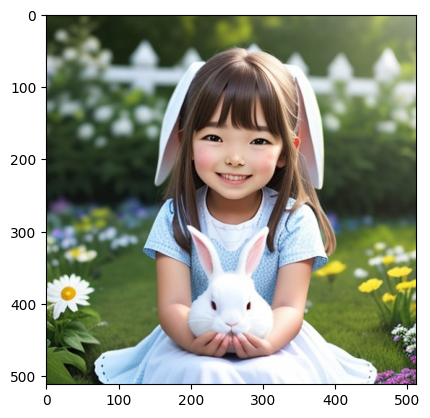

In [ ]:
# img = ins_get_image('t1')
img = cv2.imread('6.jpg')
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
faces=app.get(img)

In [ ]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

# Crop and plot faces

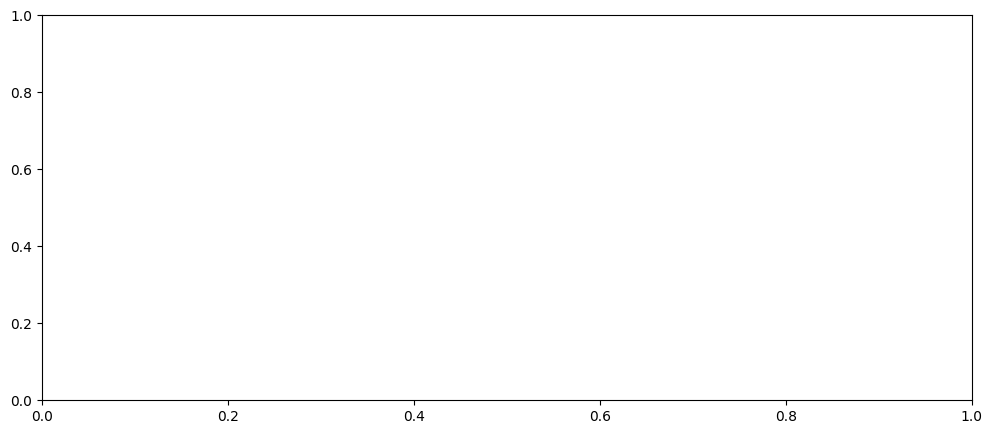

In [ ]:
# img = ins_get_image('t1')
img = cv2.imread('6.jpg')
fig, axs = plt.subplots(1, 1, figsize=(12,5))

(-0.5, 126.5, 146.5, -0.5)

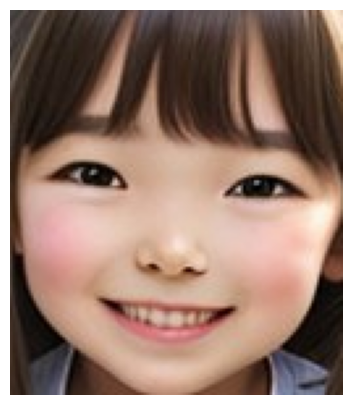

In [ ]:
# img =ins_get_image('t1')
img = cv2.imread('6.jpg')
flg,axs = plt.subplots(1,1,figsize=(12,5))

bbox = faces[0]['bbox']
bbox = [int(b) for b in bbox]
axs.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
axs.axis('off')

# 2: face swapping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://drive.google.com/file/d/1Vz5TX2bKnLqxme9ChrBY5ToC_TD9CULs/view?usp=drive_link
# https://drive.google.com/file/d/1Vz5TX2bKnLqxme9ChrBY5ToC_TD9CULs/view?usp=sharing
# Specify the Google Drive file ID and the destination path
file_id = '1Vz5TX2bKnLqxme9ChrBY5ToC_TD9CULs'
destination_path = '/content/drive/My Drive/models/inswapper_128.onnx'


# Download the model
import gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1Vz5TX2bKnLqxme9ChrBY5ToC_TD9CULs
To: /content/drive/My Drive/models/inswapper_128.onnx
100%|██████████| 554M/554M [00:09<00:00, 58.9MB/s]


'/content/drive/My Drive/models/inswapper_128.onnx'

In [ ]:
# https://drive.google.com/file/d/1Vz5TX2bKnLqxme9ChrBY5ToC_TD9CULs/view?usp=sharing
# Specify the Google Drive file ID and the destination path
file_id = '1Vz5TX2bKnLqxme9ChrBY5ToC_TD9CULs'
destination_path = '/content/models/inswapper_128.onnx'

# Download the model
import gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1Vz5TX2bKnLqxme9ChrBY5ToC_TD9CULs
To: /content/models/inswapper_128.onnx
100%|██████████| 554M/554M [00:07<00:00, 76.8MB/s]


'/content/models/inswapper_128.onnx'

In [ ]:

import shutil

source_path = '/content/models/inswapper_128.onnx'
destination_path = '/root/.insightface/models/inswapper_128.onnx'

# Move the model to the desired directory
shutil.move(source_path, destination_path)


'/root/.insightface/models/inswapper_128.onnx'

In [ ]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=True, download_zip=True)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [ ]:
# swapper = insightface.model_zoo.get_model('/content/inswapper_128 ', download=False, download_zip=False)

In [ ]:
print(swapper)

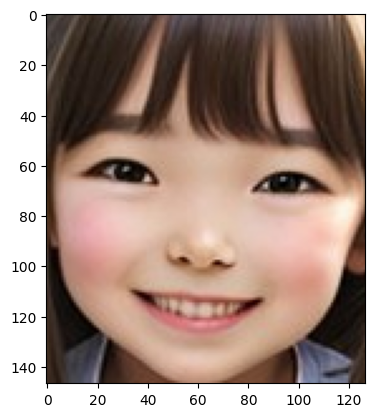

In [ ]:
source_face = faces[0]
bbox = source_face['bbox']
bbox= [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])

In [ ]:
res = img.copy()
face = cv2.imread('/content/0000.png')
source_face =app.get(face)
source_face1=source_face[0]
res1 = swapper.get(res,faces[0],source_face1,paste_back=True)

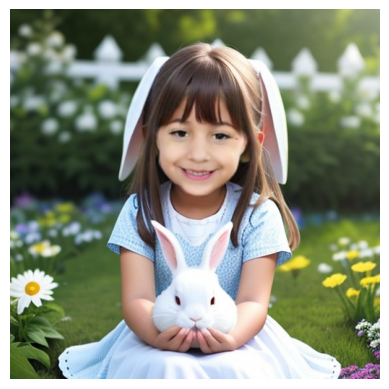

In [ ]:
fig, ax = plt.subplots()
ax.imshow(res1[:,:,::-1])
ax.axis('off')
plt.show()

# plot the swapped faces

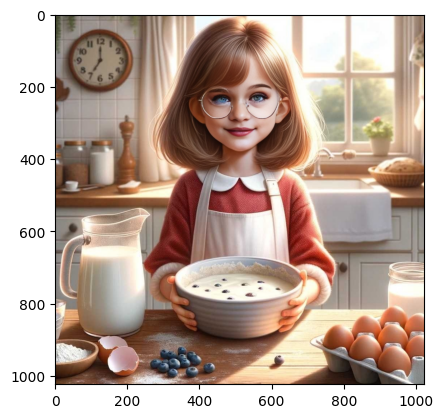

In [ ]:
plt.imshow(res[:,:,::-1])
plt.show()

In [ ]:
res=[]
for face in faces:
  _img, _ = swapper.get(img,face,source_face, paste_back=False)
  res.append(_img)
res = np.concatenate(res, axis=1)
fig,ax = plt.subplots(figsize=(15,5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

# Swap in my face

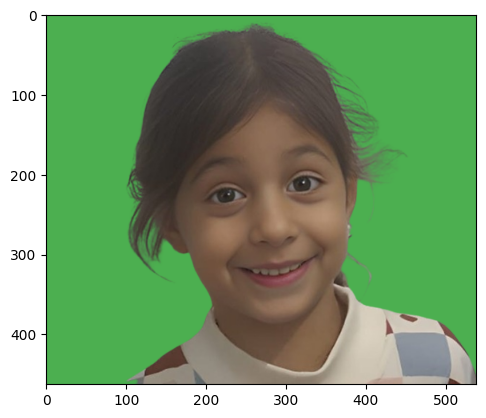

In [ ]:
rob= cv2.imread('/content/0000.png')
plt.imshow(rob[:,:,::-1])
plt.show()

In [ ]:
rob_faces =app.get(rob)
rob_face=rob_faces[0]
res=img.copy()
for face in faces:
  res = swapper.get(res, face, rob_face, paste_back=True)



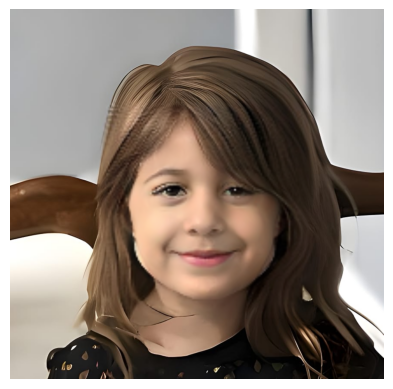

In [ ]:
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()